<a href="https://colab.research.google.com/github/sai-shravya113/emotion-recognisation/blob/main/Major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras matplotlib opencv-python

In [ ]:
!pip install matplotlib-venn

In [ ]:
from google.colab import files
files.upload()  # This should open a file upload dialog, where you select `kaggle.json`


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\r\n    "username":"saishravya113",\r\n    "key":"bf4c9ca9c7cf0f53f1842032a31884a3"\r\n}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set proper permissions


In [ ]:
!pip install kaggle
!kaggle datasets download -d msambare/fer2013  # FER2013 dataset
!unzip fer2013.zip -d dataset


Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/sad/Training_65242339.jpg  
  inflating: dataset/train/sad/Training_65267116.jpg  
  inflating: dataset/train/sad/Training_65275626.jpg  
  inflating: dataset/train/sad/Training_6529266.jpg  
  inflating: dataset/train/sad/Training_65329617.jpg  
  inflating: dataset/train/sad/Training_65338712.jpg  
  inflating: dataset/train/sad/Training_65338797.jpg  
  inflating: dataset/train/sad/Training_65387162.jpg  
  inflating: dataset/train/sad/Training_65404494.jpg  
  inflating: dataset/train/sad/Training_65426218.jpg  
  inflating: dataset/train/sad/Training_65430136.jpg  
  inflating: dataset/train/sad/Training_65437377.jpg  
  inflating: dataset/train/sad/Training_6545735.jpg  
  inflating: dataset/train/sad/Training_65463385.jpg  
  inflating: dataset/train/sad/Training_65473985.jpg  
  inflating: dataset/train/sad/Training_65502829.jpg  
  inflating: dataset/train/sad/Training_65505359.jpg  
  inflating: dat

In [ ]:
!kaggle datasets download -d msambare/fer2013


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fer2013.zip -d dataset

Archive:  fer2013.zip
replace dataset/test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls dataset/fer2013.csv

ls: cannot access 'dataset/fer2013.csv': No such file or directory


In [ ]:
!ls -lh fer2013.zip


-rw-r--r-- 1 root root 61M Jul 19  2020 fer2013.zip


In [ ]:
!unzip -l fer2013.zip


Streaming output truncated to the last 5000 lines.
     1706  2020-07-19 12:26   train/sad/Training_65275626.jpg
     1571  2020-07-19 12:26   train/sad/Training_6529266.jpg
     1499  2020-07-19 12:26   train/sad/Training_65329617.jpg
     1654  2020-07-19 12:26   train/sad/Training_65338712.jpg
     1650  2020-07-19 12:26   train/sad/Training_65338797.jpg
     1675  2020-07-19 12:26   train/sad/Training_65387162.jpg
     1644  2020-07-19 12:26   train/sad/Training_65404494.jpg
     1642  2020-07-19 12:26   train/sad/Training_65426218.jpg
     1574  2020-07-19 12:26   train/sad/Training_65430136.jpg
     1671  2020-07-19 12:26   train/sad/Training_65437377.jpg
     1321  2020-07-19 12:26   train/sad/Training_6545735.jpg
     1553  2020-07-19 12:26   train/sad/Training_65463385.jpg
     1506  2020-07-19 12:26   train/sad/Training_65473985.jpg
     1532  2020-07-19 12:26   train/sad/Training_65502829.jpg
     1760  2020-07-19 12:26   train/sad/Training_65505359.jpg
     1530  2020-07-19

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# After mounting, you can access files in Google Drive
!ls /content/drive/MyDrive/MP/


Mounted at /content/drive
fer2013


In [ ]:
!ls /content/drive/MyDrive/


'Colab Notebooks'  'DN Technoverse 2024 - Mentor badge.pptx'  'RESUME (1).pdf'
'cv latest.pdf'     MP					       RESUME.pdf


In [ ]:
!ls /content/drive/MyDrive/MP/


fer2013


In [ ]:
!ls /content/drive/MyDrive/MP/


fer2013


In [ ]:
!ls /content/drive/MyDrive/MP/fer2013/


'archive (6).zip'  'fer2013 (1).csv'   fer2013.csv   test   train


In [ ]:
!unzip /content/drive/MyDrive/MP/fer2013.zip -d /content/fer2013/


unzip:  cannot find or open /content/drive/MyDrive/MP/fer2013.zip, /content/drive/MyDrive/MP/fer2013.zip.zip or /content/drive/MyDrive/MP/fer2013.zip.ZIP.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/dataset/train/',  # Update this path as needed
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/dataset/train/',  # Same path, using a validation subset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
# Import necessary libraries
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/MP/fer2013/'  # Update this to your dataset path

# Data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path + 'train/',  # Path to the training images
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',  # Use 'binary' for binary classification
    subset='training'  # Specify training subset
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    dataset_path + 'train/',  # Same path, using a validation subset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

# Print class indices to verify
print(train_generator.class_indices)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 641 images belonging to 7 classes.
Found 160 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [ ]:
!pip install tensorflow==2.17.0  # Replace 2.x.x with the desired version


In [ ]:
!pip install --upgrade tensorflow


In [ ]:
!pip uninstall keras -y
!pip uninstall tensorflow -y
!pip install tensorflow


Found existing installation: keras 3.6.0
Uninstalling keras-3.6.0:
  Successfully uninstalled keras-3.6.0
Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and preprocessing example
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Example for loading training data
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/MP/fer2013/',  # Ensure the path is correct
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 3081 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [ ]:
# Instead of importing from keras directly, import from tensorflow.keras:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the training data from the unzipped folder
train_generator = datagen.flow_from_directory(
    '/content/dataset/train/',  # Update the path based on your unzipped folder structure
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Training set
)

# Load the validation data
validation_generator = datagen.flow_from_directory(
    '/content/dataset/train/',  # Same path, subset used for validation
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Validation set
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
# Display the class indices (labels) for verification
train_generator.class_indices


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
# Get one batch of data to check the shape
x_batch, y_batch = next(train_generator)
print(x_batch.shape, y_batch.shape)  # Expected output: (batch_size, 224, 224, 3), (batch_size, num_classes)


(32, 224, 224, 3) (32, 7)


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape
input_shape = (224, 224, 3)

# Create the model
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(train_generator.num_classes, activation='softmax')(x)  # num_classes from train_generator

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can train the model
model.fit(
    train_generator,

    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

In [ ]:
from keras.applications import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# Load VGG19 without the top layers (fully connected layers)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers of VGG19
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG19
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)  # Fully connected layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Adjust number of output classes based on your problem

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model is now defined and compiled


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
!ls  # To list all files and directories in the current working directory
!ls fer2013  # To check the contents of the 'MP' directory


sample_data
ls: cannot access 'fer2013': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/MP/fer2013/train/

angry  disgust	fear  happy  neutral  sad  surprise


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2  # 20% of the data for validation
)

# Training data generator
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/MP/fer2013/train',  # Path to your training data
    target_size=(224, 224),  # Input size for VGG19
    batch_size=32,
    class_mode='categorical',  # Adjust depending on your labels
    subset='training'  # Training data
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/MP/fer2013/test',  # Path to your validation data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Validation data
)


Found 23033 images belonging to 7 classes.
Found 1440 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D # Import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2  # Import MobileNetV2

# Load MobileNetV2 (pretrained on ImageNet)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Get the output of the base model
x = base_model.output

# Add GlobalAveragePooling2D to flatten the output
x = GlobalAveragePooling2D()(x) # Flatten the output using GlobalAveragePooling2D

# Add your new Dense layer
x = Dense(7, activation='softmax')(x)

# Create a new model with the updated output
model = Model(inputs=base_model.input, outputs=x)

# Compile the model before training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ... (Compile and train your new model) ...

history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=3,  # Fine-tune for a few epochs
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


325/719 ━━━━━━━━━━━━━━━━━━━━ 2:21:09 21s/step - accuracy: 0.2156 - loss: 1.9011

In [ ]:
for layer in base_model.layers[-4:]:  # Unfreeze last 4 layers
    layer.trainable = True

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    steps_per_epoch=100,
    validation_steps=50
)


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.2500 - loss: 2.1667 - val_accuracy: 0.2215 - val_loss: 2.6871
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.2761 - loss: 1.9063 - val_accuracy: 0.2049 - val_loss: 2.5179
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.3255 - loss: 1.8256 - val_accuracy: 0.2007 - val_loss: 2.5126
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.3037 - loss: 1.7936 - val_accuracy: 0.1611 - val_loss: 2.9482
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.3419 - loss: 1.7145 - val_accuracy: 0.1937 - val_loss: 2.7487


In [ ]:
# Evaluate the model on the test set
train_loss, train_accuracy = model.evaluate(train_generator, steps=50)
print(f"Test Loss: {train_loss:.4f}")
print(f"Test Accuracy: {train_accuracy:.4f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.1984 - loss: 2.6662
Test Loss: 2.7114
Test Accuracy: 0.2019


In [ ]:
model.save('emotion_recognition_model.keras')

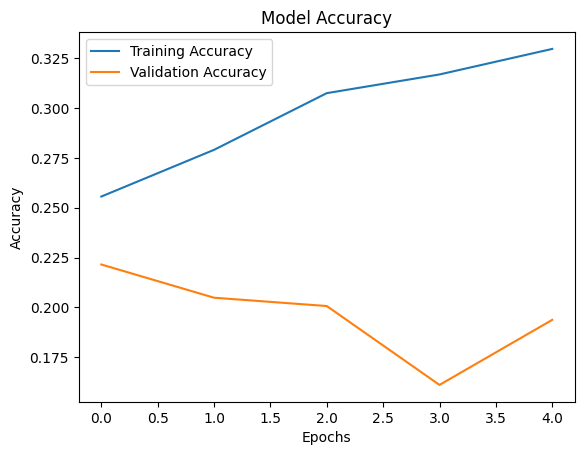

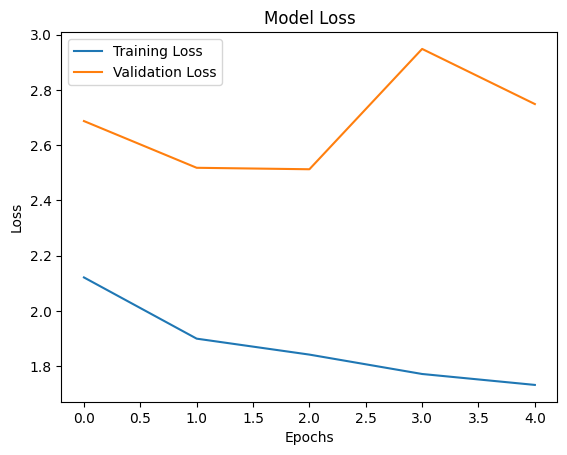

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Assuming you have loaded your training and validation data previously
# and 'y_train_list' and 'y_val_list' contain your target labels

# Convert the lists to NumPy arrays
y_train = np.array(y_train_list)  # Replace y_train_list with your actual variable name
y_val = np.array(y_val_list)    # Replace y_val_list with your actual variable name

NameError: name 'y_train_list' is not defined

In [ ]:
import numpy as np

y_train = np.array(y_train)
y_val = np.array(y_val)


NameError: name 'y_train' is not defined

In [ ]:
Embedding(input_dim=1000, output_dim=64)


NameError: name 'Embedding' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming your data is preprocessed and available as train_images, train_labels, val_images, val_labels
# Replace the below variables with the correct dataset variables
train_images, train_labels = X_train, y_train  # Replace with your train data
test_images, test_labels = X_val, y_val          # Replace with your validation data

# Load the VGG-19 model as a base model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Adjust shape if needed
base_model.trainable = False  # Freeze the base model

# Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(set(train_labels)), activation='softmax')  # Change len(set()) to the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse if labels are integers
              metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

# Fit the model
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    validation_data=(val_images / 255., val_labels),  # Normalize validation data
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

# Plot accuracy and loss for analysis
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'X_train' is not defined

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6667 - loss: 0.6327 - val_accuracy: 1.0000 - val_loss: 0.6625 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - accuracy: 0.3333 - loss: 0.7673 - val_accuracy: 1.0000 - val_loss: 0.6580 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6667 - loss: 0.5741 - val_accuracy: 1.0000 - val_loss: 0.6525 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3333 - loss: 0.8802 - val_accuracy: 1.0000 - val_loss: 0.6500 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.4680 - val_accuracy: 1.0000 - val_loss: 0.6446 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - loss: 0.4539 - val_accuracy: 1.0000 - val_loss: 0.6392 - learning_rate: 0.0010
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6667 - loss: 0.4964 - val_accuracy: 1.0000

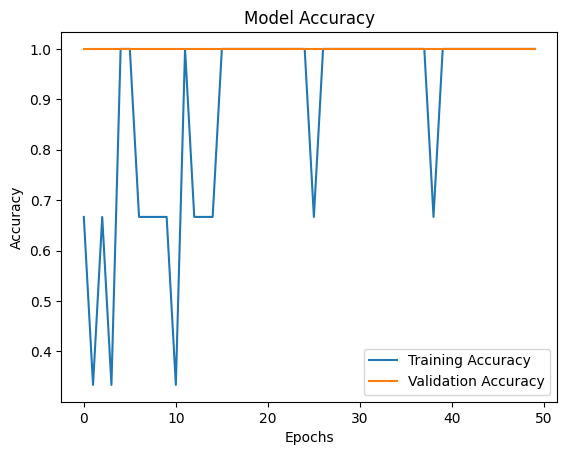

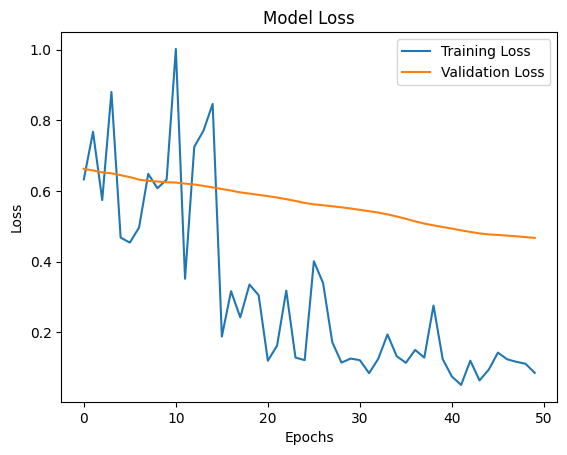

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Example datasets (replace with your actual dataset)
complaints_train = ["Pipe leakage", "Power outage in my area", "Garbage not collected"]
complaints_val = ["Streetlight not working", "Water supply issue"]
labels_train = [1, 0, 1]  # Example binary labels (1: Complaint, 0: No Complaint)
labels_val = [1, 1]

# Tokenize and pad sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(complaints_train)

X_train = pad_sequences(tokenizer.texts_to_sequences(complaints_train), maxlen=20)
X_val = pad_sequences(tokenizer.texts_to_sequences(complaints_val), maxlen=20)

y_train = np.array(labels_train)  # Convert to numpy arrays
y_val = np.array(labels_val)

# Define the model
model = Sequential([
    Embedding(input_dim=1000, output_dim=64),  # Removed input_length
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping, reduce_lr])

# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6667 - loss: 2.8574 - val_accuracy: 1.0000 - val_loss: 2.7305 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6667 - loss: 2.7373 - val_accuracy: 1.0000 - val_loss: 2.6984 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 2.5230 - val_accuracy: 1.0000 - val_loss: 2.6637 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3333 - loss: 2.6619 - val_accuracy: 1.0000 - val_loss: 2.6326 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6667 - loss: 2.6206 - val_accuracy: 1.0000 - val_loss: 2.6009 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6667 - loss: 2.6027 - val_accuracy: 1.0000 - val_loss: 2.5700 - learning_rate: 0.0010
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3333 - loss: 2.6244 - val_accuracy: 1.0000 

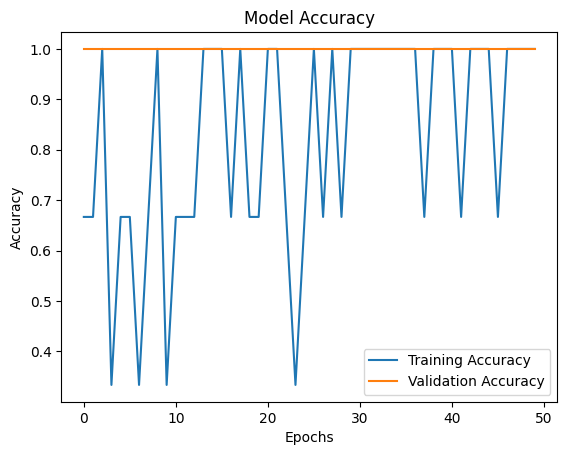

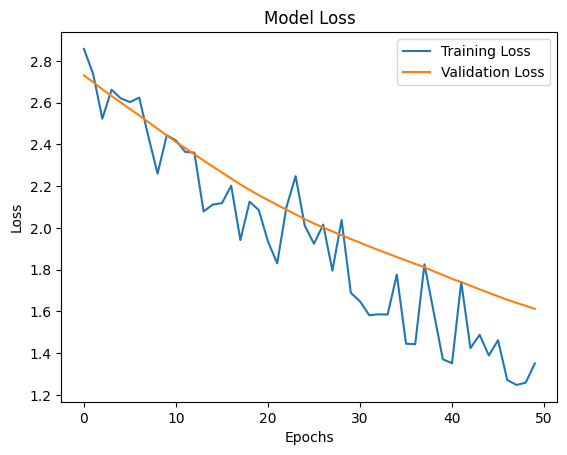

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Example datasets (replace with your actual dataset)
complaints_train = ["Pipe leakage", "Power outage in my area", "Garbage not collected"]
complaints_val = ["Streetlight not working", "Water supply issue"]
labels_train = [1, 0, 1]  # Example binary labels (1: Complaint, 0: No Complaint)
labels_val = [1, 1]

# Tokenize and pad sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(complaints_train)

X_train = pad_sequences(tokenizer.texts_to_sequences(complaints_train), maxlen=20)
X_val = pad_sequences(tokenizer.texts_to_sequences(complaints_val), maxlen=20)

y_train = np.array(labels_train)  # Convert to numpy arrays
y_val = np.array(labels_val)

# Define the model
model = Sequential([
    Embedding(input_dim=1000, output_dim=64),
    LSTM(64, return_sequences=True, kernel_regularizer='l2'),
    Dropout(0.4),
    LSTM(32, kernel_regularizer='l2'),
    Dropout(0.4),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=16,
                    callbacks=[early_stopping, reduce_lr])

# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
!pip install opencv-python-headless


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('emotion_recognition_model.keras')

# Define emotion labels (make sure they match your dataset)
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


In [ ]:
import cv2
import numpy as np

# Define the prediction function
def predict_emotion(image):
    # Resize and preprocess the image
    img = cv2.resize(image, (224, 224))  # Adjust the size to match the input shape of your model
    img_array = np.expand_dims(img, axis=0) / 255.0  # Normalize pixel values
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return emotion_labels[predicted_class]  # Return the emotion label


In [ ]:
pip install gradio huggingface_hub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
pip install huggingface_hub


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
The token `MP 2024` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate 

In [ ]:
!huggingface-cli login --token <your_token_here>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `huggingface-cli login --token <your_token_here>'


In [ ]:
import os

# Rename the file to use .keras extension
os.rename('emotion_recognition_model.h5', 'emotion_recognition_model.keras')

# Load the model
from keras.models import load_model
model = load_model('emotion_recognition_model.keras')


FileNotFoundError: [Errno 2] No such file or directory: 'emotion_recognition_model.h5' -> 'emotion_recognition_model.keras'

In [ ]:
model.summary()


NameError: name 'model' is not defined

In [ ]:
def predict_emotion(image):
    # Convert image to RGB (Gradio provides images in RGB, but OpenCV reads in BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Ensure image is the expected shape
    print(f"Image shape: {image.shape}")  # This should print (224, 224, 3)

    # Resize the image to the input size of the model
    img = cv2.resize(image, (224, 224))

    # Normalize the image and expand dimensions to match the model input
    img_array = np.expand_dims(img, axis=0) / 255.0

    print(f"Processed image shape: {img_array.shape}")  # This should print (1, 224, 224, 3)

    # Make prediction
    predictions = model.predict(img_array)

    # Get the index of the highest prediction
    predicted_class = np.argmax(predictions)

    return emotion_labels[predicted_class]


In [ ]:
import cv2
import numpy as np

def predict_emotion(image):
    # Convert image to RGB (Gradio provides images in RGB, but OpenCV reads in BGR)
    # Check if the image was loaded successfully
    if image is None:
        print("Error: Image not loaded. Check the image path.")
        return "Error: Image not loaded."  # Or handle the error differently

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Ensure image is the expected shape
    print(f"Image shape: {image.shape}")  # This should print (224, 224, 3)

    # Resize the image to the input size of the model
    img = cv2.resize(image, (224, 224))

    # Normalize the image and expand dimensions to match the model input
    img_array = np.expand_dims(img, axis=0) / 255.0 # Define img_array here

    print(f"Processed image shape: {img_array.shape}")  # This should print (1, 224, 224, 3)

    # Make prediction
    predictions = model.predict(img_array)

    # Get the index of the highest prediction
    predicted_class = np.argmax(predictions)

    return emotion_labels[predicted_class]

# Assuming you have an image loaded into a variable named 'image'
# Example: image = cv2.imread('path/to/your/image.jpg')

# Call the predict_emotion function with the image to get predictions
# and assign the result to the predictions variable
# Replace with a valid image path. Make sure the image exists
image = cv2.imread('/path/to/a/valid/image.jpg')
#image = cv2.imread('happy.jpg')
predictions = predict_emotion(image)

print(f"Predictions: {predictions}")  # This will print the prediction result

Error: Image not loaded. Check the image path.
Predictions: Error: Image not loaded.


In [ ]:
import cv2
import numpy as np

def predict_emotion(image):
    # Convert image to RGB (Gradio provides images in RGB, but OpenCV reads in BGR)
    # Check if the image was loaded successfully
    if image is None:
        print("Error: Image not loaded. Check the image path.")
        return "Error: Image not loaded."  # Or handle the error differently

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Ensure image is the expected shape
    print(f"Image shape: {image.shape}")  # This should print (224, 224, 3)

    # Resize the image to the input size of the model
    img = cv2.resize(image, (224, 224))

    # Normalize the image and expand dimensions to match the model input
    img_array = np.expand_dims(img, axis=0) / 255.0 # Define img_array here

    print(f"Processed image shape: {img_array.shape}")  # This should print (1, 224, 224, 3)

    # Make prediction
    predictions = model.predict(img_array)

    # Get the index of the highest prediction
    predicted_class = np.argmax(predictions)

    return emotion_labels[predicted_class]

# Assuming you have an image loaded into a variable named 'image'
# Example: image = cv2.imread('path/to/your/image.jpg')

# Call the predict_emotion function with the image to get predictions
# and assign the result to the predictions variable
# Replace with a valid image path. Make sure the image exists
image = cv2.imread('/path/to/a/valid/image.jpg')
#image = cv2.imread('happy.jpg')
predictions = predict_emotion(image)

print(f"Predictions: {predictions}")  # This will print the prediction result

Error: Image not loaded. Check the image path.
Predictions: Error: Image not loaded.


In [ ]:
from tensorflow.keras.activations import softmax

# Apply softmax if necessary
predictions = softmax(predictions, axis=-1)

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('emotion_recognition_model.keras')

# Define emotion labels
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Define the prediction function
def predict_emotion(image):
    # Convert image to RGB (Gradio provides images in RGB, but OpenCV reads in BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to the input size of the model
    img = cv2.resize(image, (224, 224))

    # Normalize the image and expand dimensions to match the model input
    img_array = np.expand_dims(img, axis=0) / 255.0

    # Make prediction
    predictions = model.predict(img_array)

    # Get the index of the highest prediction
    predicted_class = np.argmax(predictions)

    return emotion_labels[predicted_class]

# Create a Gradio interface
interface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Image(type="numpy", label="Upload Image"),
    outputs=gr.Label(label="Predicted Emotion"),
    title="Emotion Recognition",
    description="Upload an image, and the model will predict the emotion."
)

# Launch the app
interface.launch(debug=False)


ModuleNotFoundError: No module named 'gradio'

In [ ]:
import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('emotion_recognition_model.keras')

# Define emotion labels
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Define the prediction function
def predict_emotion(image):
    # Resize and preprocess the image
    img = cv2.resize(image, (224, 224))
    img_array = np.expand_dims(img, axis=0) / 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return emotion_labels[predicted_class]

# Create a Gradio interface
interface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Image(type="numpy", label="Upload Image"),
    outputs=gr.Label(label="Predicted Emotion"),
    title="Emotion Recognition",
    description="Upload an image, and the model will predict the emotion."
)

# Launch the app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://181ae6de8c0ececcc5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr

# Create a Gradio interface
interface = gr.Interface(
    fn=predict_emotion,  # Function to call for predictions
    inputs=gr.Image(type="numpy", label="Upload Image"),  # Input type is an image
    outputs=gr.Label(label="Predicted Emotion"),  # Output type is a label
    title="Emotion Recognition",
    description="Upload an image, and the model will predict the emotion."
)

# Launch the interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://77778a95ceefc4d9fe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import os

# List all files in the current directory
print(os.listdir('.'))


['.config', 'my_model.keras', 'drive', 'emotion_recognition_vgg19.h5', 'emotion_recognition_model.keras', 'sample_data']


In [ ]:
model.save('emotion_recognition_model.h5')  # Save as .h5 file


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.1


In [ ]:
from tensorflow.keras.models import load_model

# Load the model without loading the optimizer state
model = load_model('emotion_recognition_model.keras', compile=False)

# Compile the model with a new optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


ValueError: File not found: filepath=emotion_recognition_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('emotion_recognition_model.keras')  # Ensure the filename matches


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from google.colab import files

# Upload the model file
uploaded = files.upload()


Saving Major_project (2).zip to Major_project (2).zip


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
from tensorflow.keras.models import load_model
model = load_model('emotion_recognition_model.h5')  # Ensure the model path is correct

# Define emotion labels
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def predict_emotion(frame):
    # Preprocess the frame
    img = cv2.resize(frame, (224, 224))  # Resize to model input size
    img_array = np.expand_dims(img, axis=0) / 255.0  # Normalize and expand dimensions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return emotion_labels[predicted_class]

# Open the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break

    # Get prediction
    emotion = predict_emotion(frame)

    # Display the frame with prediction
    cv2.putText(frame, f"Emotion: {emotion}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Emotion Detection", frame)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'emotion_recognition_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
from IPython.display import display
import ipywidgets as widgets
from tensorflow.keras.preprocessing import image
import numpy as np

# Emotion labels
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Function to load and predict image
def load_and_predict(change):
    img_path = file_selector.value
    if img_path:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        result_label.value = f"Predicted Emotion: {emotion_labels[predicted_class[0]]}"

# File selector
file_selector = widgets.Text(
    value='',
    placeholder='Enter the path to the image file',
    description='File:'
)
file_selector.observe(load_and_predict, names='value')

# Display result
result_label = widgets.Label(value="Predicted Emotion: None")

# Display widgets
display(file_selector, result_label)


Text(value='', description='File:', placeholder='Enter the path to the image file')

Label(value='Predicted Emotion: None')

FileNotFoundError: [Errno 2] No such file or directory: '"C:\\Users\\DELL\\OneDrive\\Pictures\\mummy.jpg"'

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

def load_and_predict():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = image.load_img(file_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        result_label.config(text=f"Predicted Emotion: {emotion_labels[predicted_class[0]]}")

# GUI setup
app = tk.Tk()
app.title("Emotion Recognition")

load_button = tk.Button(app, text="Load Image", command=load_and_predict)
load_button.pack()

result_label = tk.Label(app, text="Predicted Emotion: None")
result_label.pack()

app.mainloop()


TclError: no display name and no $DISPLAY environment variable

In [ ]:
model.save('emotion_recognition_vgg19.h5')

In [ ]:
# Import required libraries
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the trained model
model = load_model('emotion_recognition_model.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'emotion_recognition_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import load_model # Remove the extra spaces before this line

In [ ]:
from keras.models import load_model

model = load_model('emotion_recognition_vgg19.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'emotion_recognition_vgg19.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=3, batch_size=32)

# Evaluate the model
model.evaluate(test_data, train_labels)


NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Generate dummy data
input_dim = 10
num_classes = 3
train_data = np.random.random((100, input_dim))
train_labels = np.random.randint(num_classes, size=(100,))

# Convert labels to one-hot encoding
train_labels = np.eye(num_classes)[train_labels]

# Define a model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=3, batch_size=32)


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3219 - loss: 1.0923
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3886 - loss: 1.0681 
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4199 - loss: 1.0777 


In [ ]:
from tensorflow.keras.models import load_model

# Load the H5 model
model = load_model('emotion_recognition_vgg19.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'emotion_recognition_vgg19.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import tensorflow as tf

# Load the TensorFlow SavedModel
model = tf.keras.models.load_model('emotion_recognition_vgg19.h5')

# Save the model in H5 format
model.save('emotion_recognition_vgg19.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'emotion_recognition_vgg19.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
np.save('your_data.npy', data_array)  # Save the feature data
np.save('your_labels.npy', label_array)  # Save the corresponding labels


NameError: name 'data_array' is not defined

In [ ]:
from keras.models import load_model
from sklearn.model_selection import train_test_split # Add this import to split data
import numpy as np # Import numpy if not already

# Load your dataset here (replace with your data loading code)
# For example, assuming you have your data in 'data' and labels in 'labels':
data = np.load('your_data.npy')  # Replace with your data file
labels = np.load('your_labels.npy') # Replace with your labels file

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)  # Adjust test_size and random_state as needed

model = load_model('emotion_recognition_vgg19.h5')

results = model.evaluate(x_test, y_test)
print("Evaluation results:", results)

FileNotFoundError: [Errno 2] No such file or directory: 'your_data.npy'

In [ ]:
!apt-get update
!apt-get install -y xvfb
!pip install pyvirtualdisplay

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,110 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,615 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

In [ ]:
import cv2
import numpy as np
from tkinter import *
from PIL import Image, ImageTk
from pyvirtualdisplay import Display

# Initialize a virtual display
display = Display(visible=0, size=(800, 600))
display.start()

# Initialize GUI
root = Tk()
root.title("Emotion Recognition")

# ... (Rest of your code)
# Load the model
model = load_model('emotion_recognition_vgg19.h5')

# Define labels
labels = {0: 'Stress', 1: 'Anxiety', 2: 'Depression'}

# Capture video from webcam
cap = cv2.VideoCapture(0)

def recognize_emotion():
    ret, frame = cap.read()
    if ret:
        img = cv2.resize(frame, (224, 224))  # Resize to VGG19 input size
        img_array = np.expand_dims(img, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Normalize image

        # Make prediction
        prediction = model.predict(img_array)
        emotion = labels[np.argmax(prediction)]

        # Display the result in GUI
        img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        imgtk = ImageTk.PhotoImage(image=img)
        panel.imgtk = imgtk
        panel.config(image=imgtk)
        result_label.config(text=f'Emotion: {emotion}')

    root.after(10, recognize_emotion)

# GUI components
panel = Label(root)
panel.pack(padx=10, pady=10)
result_label = Label(root, text="Emotion: None", font=('Helvetica', 16))
result_label.pack(padx=10, pady=10)

# Start emotion recognition
recognize_emotion()

# Start the GUI loop
root.mainloop()

cap.release()
cv2.destroyAllWindows()



NameError: name 'load_model' is not defined

In [ ]:
img = cv2.imread('test_image.jpg')
img = cv2.resize(img, (224, 224))
img_array = np.expand_dims(img, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
emotion = labels[np.argmax(prediction)]
print(f'Predicted emotion: {emotion}')


In [ ]:
def give_feedback(emotion):
    if emotion == 'Stress' or emotion == 'Anxiety':
        feedback = "Take deep breaths and try to relax."
    else:
        feedback = "You seem to be in a good emotional state!"

    feedback_label.config(text=feedback)

# Modify the open_image function to include feedback
def open_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = preprocess_image(file_path)
        prediction = model.predict(img)
        emotion = np.argmax(prediction)
        emotion_text = emotion_dict[emotion]
        label.config(text=f"Predicted Emotion: {emotion_text}")
        give_feedback(emotion_text)

# Add feedback label in GUI
feedback_label = tk.Label(root, text='Feedback: None')
canvas.create_window(300, 350, window=feedback_label)
